In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:/credit suisse")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import lfilter

In [4]:
df1=pd.read_csv('AXISBANK.NS.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,253.199997,254.000000,248.020004,248.770004,213.306046,6417705.0
1,2013-04-05,248.089996,249.869995,243.440002,245.910004,210.853775,6484050.0
2,2013-04-08,245.300003,247.600006,239.600006,240.639999,206.335022,4864420.0
3,2013-04-09,242.070007,247.960007,239.759995,240.639999,206.335022,7490495.0
4,2013-04-10,242.960007,248.570007,240.000000,247.860001,212.525757,10046765.0
5,2013-04-11,249.309998,250.979996,246.199997,250.429993,214.729401,9714180.0
6,2013-04-12,248.000000,255.399994,246.899994,252.860001,216.812988,7911225.0
7,2013-04-15,251.199997,262.269989,250.800003,258.839996,221.940491,7689700.0
8,2013-04-16,257.299988,273.799988,256.549988,272.660004,233.790359,11987860.0
9,2013-04-17,274.359985,290.000000,273.230011,275.440002,236.174042,9186545.0


In [5]:
df1.shape

(1232, 7)

In [6]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
df1['Date']=pd.to_datetime(df1['Date'])

In [8]:
df1.isnull().sum()

Date          0
Open         11
High         11
Low          11
Close        11
Adj Close    11
Volume       11
dtype: int64

In [9]:
df1.fillna(df1.mean(),inplace=True)

In [10]:
close_zero=df1.iloc[-1].Close

In [11]:
df1['HL_PCT'] = (df1['High'] - df1['Low'])/(df1['Low']*100)

In [12]:
df1['PCT_CHNG_OpCl'] = (df1['Close'] - df1['Open'])/(df1['Open']*100)

In [13]:
df1['PCT_CHNG_CLOSE'] = (df1['Close'] - df1['Adj Close'])/(df1['Adj Close']*100)

In [14]:
df1.index=df1['Date']

In [15]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE
Date,,,,,,,,,,
2013-04-04,2013-04-04,253.199997,254.000000,248.020004,248.770004,213.306046,6417705.0,0.000241,-0.000175,0.001663
2013-04-05,2013-04-05,248.089996,249.869995,243.440002,245.910004,210.853775,6484050.0,0.000264,-0.000088,0.001663
2013-04-08,2013-04-08,245.300003,247.600006,239.600006,240.639999,206.335022,4864420.0,0.000334,-0.000190,0.001663
2013-04-09,2013-04-09,242.070007,247.960007,239.759995,240.639999,206.335022,7490495.0,0.000342,-0.000059,0.001663
2013-04-10,2013-04-10,242.960007,248.570007,240.000000,247.860001,212.525757,10046765.0,0.000357,0.000202,0.001663


In [16]:
df=df1[['Open','High','Low','Adj Close','Volume','HL_PCT','PCT_CHNG_OpCl','PCT_CHNG_CLOSE','Close']]

## Prediction for 30th Day

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import datetime

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


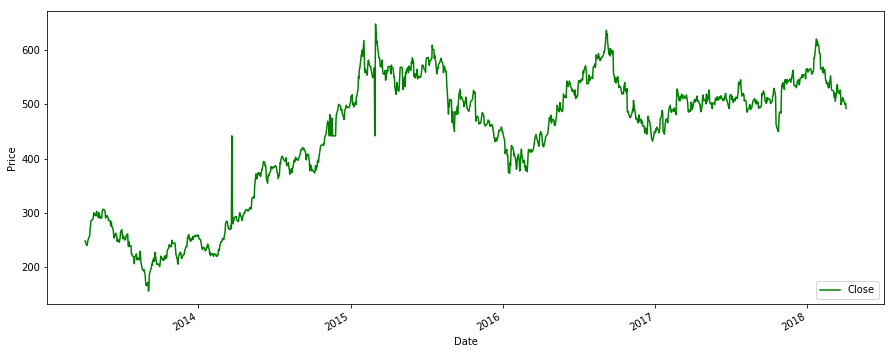

In [18]:
df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df.tail()

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close
Date,,,,,,,,,
2018-03-27,512.299988,522.549988,509.049988,512.200012,6423140.0,0.000265,-0.000002,0.0,512.200012
2018-03-28,512.900024,512.900024,501.600006,510.500000,10980960.0,0.000225,-0.000047,0.0,510.500000
2018-04-02,510.500000,510.500000,492.200012,499.049988,7120498.0,0.000372,-0.000224,0.0,499.049988
2018-04-03,494.000000,506.000000,493.700012,501.549988,6053789.0,0.000249,0.000153,0.0,501.549988
2018-04-04,504.500000,504.500000,490.250000,492.250000,6047813.0,0.000291,-0.000243,0.0,492.250000


In [20]:
forecast_col = 'Close'

forecast_out = int(42)
# We will drop 12 columns because there are 12 holidays

In [21]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))

                  Open        High         Low   Adj Close     Volume  \
Date                                                                    
2013-04-04  253.199997  254.000000  248.020004  213.306046  6417705.0   
2013-04-05  248.089996  249.869995  243.440002  210.853775  6484050.0   

              HL_PCT  PCT_CHNG_OpCl  PCT_CHNG_CLOSE       Close       label  
Date                                                                         
2013-04-04  0.000241      -0.000175        0.001663  248.770004  283.619995  
2013-04-05  0.000264      -0.000088        0.001663  245.910004  275.649994  


In [22]:
X = np.array(df.drop(['label'], 1))

In [23]:
X = preprocessing.scale(X)

In [24]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

In [25]:
y = np.array(df['label'])
y = y[:-forecast_out]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print("Accuracy of our prediction model",clf.score(X_test, y_test)*100,"%")

Accuracy of our prediction model 82.42840261284643 %


In [29]:
# Taking first 30 values since 12 days are holidays

forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction[:30])

[545.20978861 544.99242903 535.5016044  535.68332237 536.77500332
 528.86598002 534.26943924 530.23101433 531.33739528 524.54651512
 520.86573095 520.20765527 524.97351821 516.98588307 521.85775792
 513.66616683 520.63636316 528.49649693 520.82607763 517.28701872
 509.67148513 511.23564203 508.08535966 504.17356699 513.61519108
 504.95311784 513.43610474 518.59171255 522.00003977 514.55427197]


In [30]:
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [31]:
df

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04 00:00:00,253.199997,254.000000,248.020004,213.306046,6417705.0,0.000241,-0.000175,0.001663,248.770004,283.619995,NaN
2013-04-05 00:00:00,248.089996,249.869995,243.440002,210.853775,6484050.0,0.000264,-0.000088,0.001663,245.910004,275.649994,NaN
2013-04-08 00:00:00,245.300003,247.600006,239.600006,206.335022,4864420.0,0.000334,-0.000190,0.001663,240.639999,271.049988,NaN
2013-04-09 00:00:00,242.070007,247.960007,239.759995,206.335022,7490495.0,0.000342,-0.000059,0.001663,240.639999,264.540009,NaN
2013-04-10 00:00:00,242.960007,248.570007,240.000000,212.525757,10046765.0,0.000357,0.000202,0.001663,247.860001,254.889999,NaN
2013-04-11 00:00:00,249.309998,250.979996,246.199997,214.729401,9714180.0,0.000194,0.000045,0.001663,250.429993,254.130005,NaN
2013-04-12 00:00:00,248.000000,255.399994,246.899994,216.812988,7911225.0,0.000344,0.000196,0.001663,252.860001,259.600006,NaN
2013-04-15 00:00:00,251.199997,262.269989,250.800003,221.940491,7689700.0,0.000457,0.000304,0.001663,258.839996,263.209991,NaN
2013-04-16 00:00:00,257.299988,273.799988,256.549988,233.790359,11987860.0,0.000672,0.000597,0.001663,272.660004,257.320007,NaN


In [32]:
pred=df[-42:]

In [33]:
df=df[:-42]

In [34]:
pred

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-04-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.209789
2018-04-06 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544.992429
2018-04-07 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.501604
2018-04-08 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.683322
2018-04-09 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536.775003
2018-04-10 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.865980
2018-04-11 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.269439
2018-04-12 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.231014
2018-04-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.337395


In [35]:
pred=pred.reset_index()

In [36]:
pred['Date']=pred['Date'].dt.date

In [37]:
pred.head(1)

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.209789


In [38]:
holidays=['2018-04-07','2018-04-08','2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-01','2018-05-05','2018-05-06','2018-05-12','2018-05-13']

In [39]:
pred['Date']=pred['Date'].apply(str)

In [40]:
for i in holidays:
    pred = pred.drop(pred[pred.Date==i].index)

In [41]:
pred['Date']=pd.to_datetime(pred['Date'])

In [42]:
pred.drop('forecast',axis=1,inplace=True)

In [43]:
pred.shape

(29, 11)

In [44]:
pred['forecast']=forecast_prediction[:29]

In [45]:
pred

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.209789
1,2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544.992429
4,2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.501604
5,2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.683322
6,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536.775003
7,2018-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.865980
8,2018-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.269439
11,2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.231014
12,2018-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.337395
13,2018-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.546515


In [46]:
pred.index=pred['Date']
pred.drop('Date',axis=1,inplace=True)

In [47]:
df=df.append(pred)

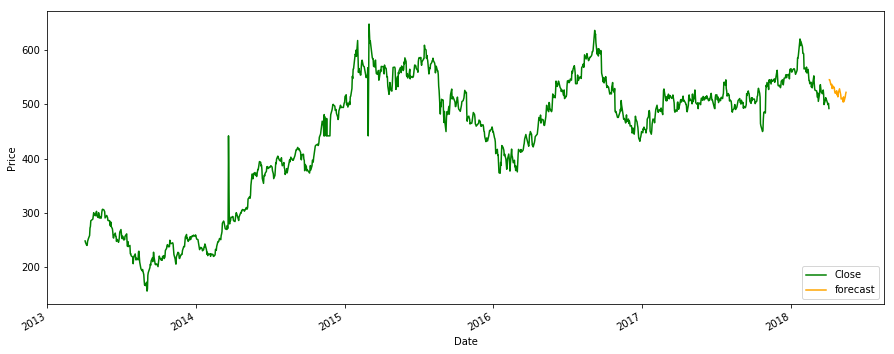

In [48]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

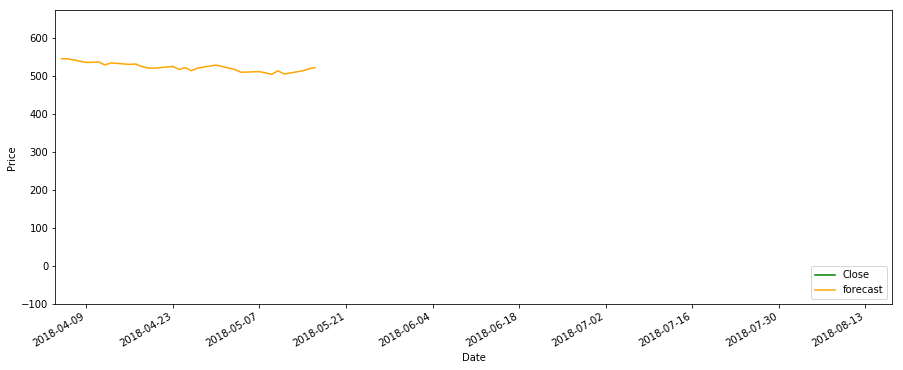

In [49]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2018, 4, 4))
plt.ylim(ymin=-100)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [50]:
df.iloc[-1]

Open                    NaN
High                    NaN
Low                     NaN
Adj Close               NaN
Volume                  NaN
HL_PCT                  NaN
PCT_CHNG_OpCl           NaN
PCT_CHNG_CLOSE          NaN
Close                   NaN
label                   NaN
forecast          522.00004
Name: 2018-05-16 00:00:00, dtype: float64

In [51]:
close_last=df.iloc[-1].forecast

In [52]:
pred_return=close_last-close_zero
print("Predicted Return: Rs.",pred_return)

Predicted Return: Rs. 29.750039767815338


## Simple Moving Average (30,40,50)

In [53]:
# For 30 days
short_rolling = df.rolling(window=30).mean()
short_rolling.head(30)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# For 40 days
med_rolling = df.rolling(window=40).mean()
med_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# For 50 days
long_rolling = df.rolling(window=50).mean()
long_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Price in Rs.')

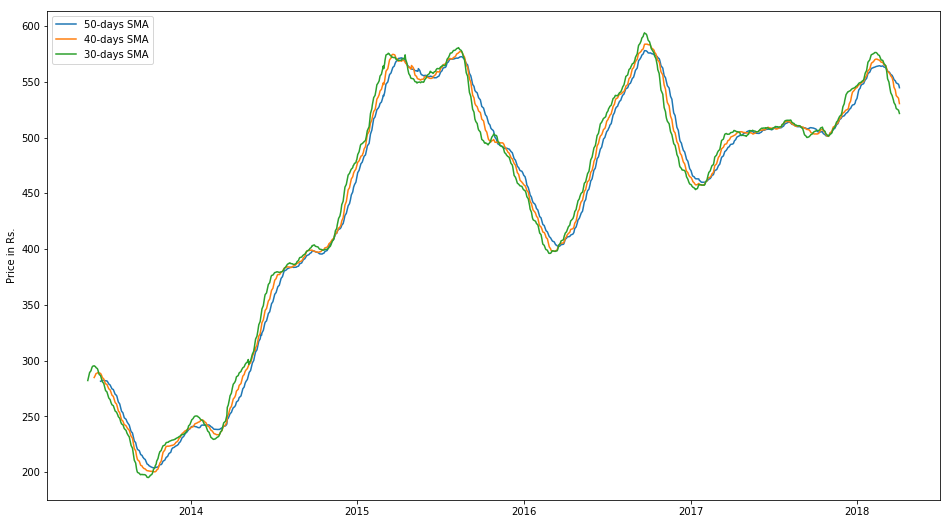

In [56]:
start_date = '2013-04-29'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(med_rolling.loc[start_date:end_date, :].index, med_rolling.loc[start_date:end_date, 'Close'], label = '40-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')


ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')


## Exponential Moving Average (30,40,50)

Text(0,0.5,'Price in Rs.')

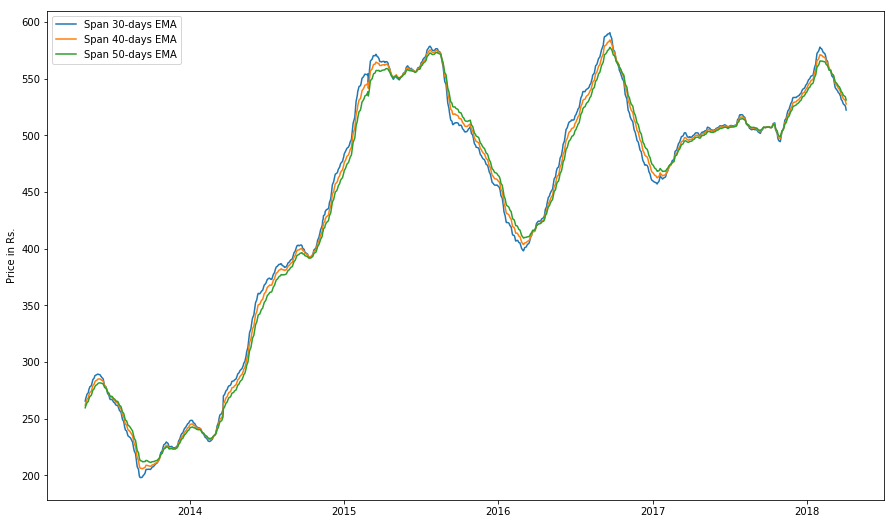

In [57]:
ema_short = df.ewm(span=30, adjust=False).mean()
ema_med = df.ewm(span=40, adjust=False).mean()
ema_long = df.ewm(span=50, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 30-days EMA')
ax.plot(ema_med.loc[start_date:end_date, :].index, ema_med.loc[start_date:end_date, 'Close'], label = 'Span 40-days EMA')
ax.plot(ema_long.loc[start_date:end_date, :].index, ema_long.loc[start_date:end_date, 'Close'], label = 'Span 50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')

## Aroon Oscillator (30,40,50)

In [58]:
from pandas.stats import moments
from pandas import DataFrame

In [59]:
def aroon(s, n):
    up = 100 * moments.rolling_apply(s.High, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.Low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [60]:
ao30=aroon(df,30)
ao40=aroon(df,40)
ao50=aroon(df,50)

In [61]:
ao30

,down,up
Date,,
2013-04-04,NaN,NaN
2013-04-05,NaN,NaN
2013-04-08,NaN,NaN
2013-04-09,NaN,NaN
2013-04-10,NaN,NaN
2013-04-11,NaN,NaN
2013-04-12,NaN,NaN
2013-04-15,NaN,NaN
2013-04-16,NaN,NaN


Text(0,0.5,'Change in Price in Rs.')

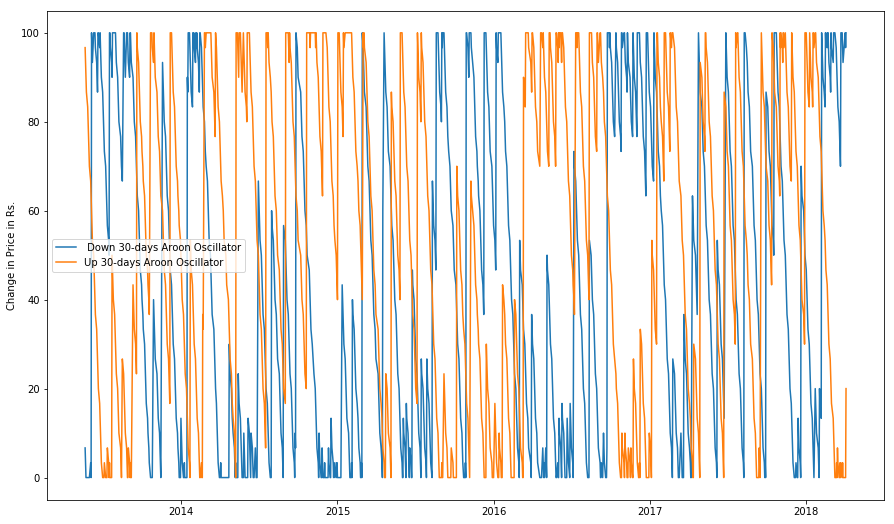

In [62]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 30-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 30-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

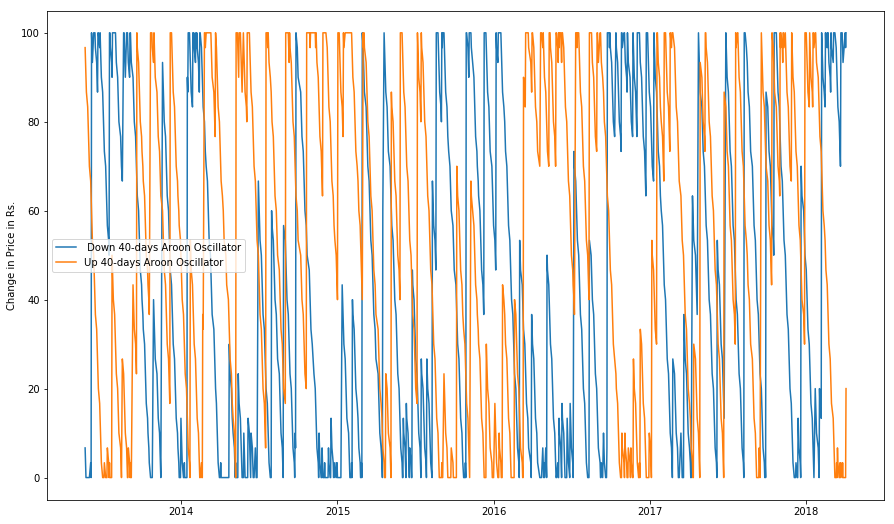

In [63]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 40-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 40-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

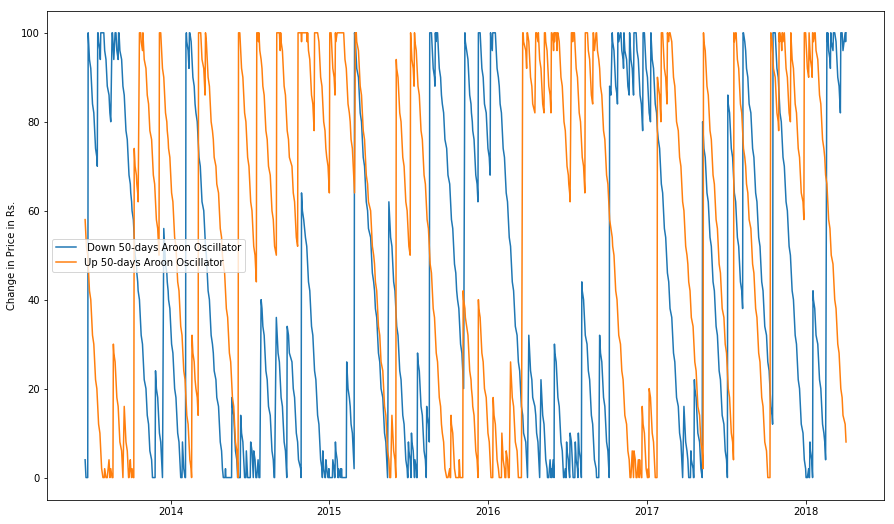

In [64]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'down'], label = ' Down 50-days Aroon Oscillator')
ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'up'], label = 'Up 50-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

## MACD Signal

In [65]:
def ema(s, n, wilder=False):
    span = n if not wilder else 2*n - 1
    return moments.ewma(s, span=span)


def macd(s, nfast=12, nslow=26, nsig=9, percent=True):
    fast, slow = ema(s, nfast), ema(s, nslow)

    if percent:
        macd = 100*(fast / slow - 1)
    else:
        macd = fast - slow

    sig = ema(macd, nsig)
    hist = macd - sig

    return DataFrame(dict(macd=macd, signal=sig, hist=hist,
                          fast=fast, slow=slow))

In [66]:
m=macd(df['Close'])

In [67]:
m.head(1)

,fast,hist,macd,signal,slow
Date,,,,,
2013-04-04,248.770004,0.0,0.0,0.0,248.770004


Text(0,0.5,'Change ')

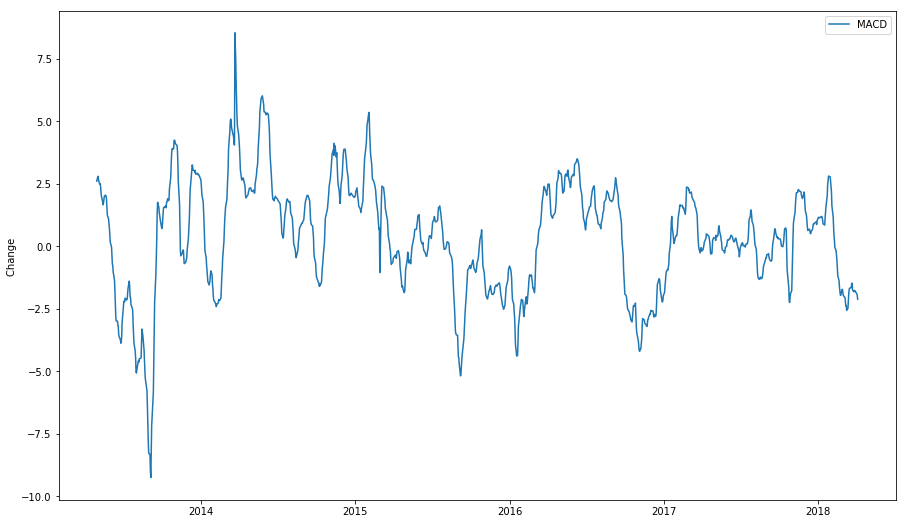

In [68]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(m.loc[start_date:end_date, :].index, m.loc[start_date:end_date, 'macd'], label = 'MACD')

ax.legend(loc='best')
ax.set_ylabel('Change ')

## Relative Strength Index (RSI)

In [69]:
def rsi(s, n=14):
    diff = s.diff()
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, wilder=True)
    emadn = ema(dn, n, wilder=True)

    return 100 * emaup/(emaup + emadn)

In [70]:
sf=rsi(df['Close'],50)

In [71]:
sfd=pd.DataFrame({'Date':sf.index, 'RSI':sf.values})

In [72]:
sfd.index=sfd['Date']

Text(0,0.5,'Change')

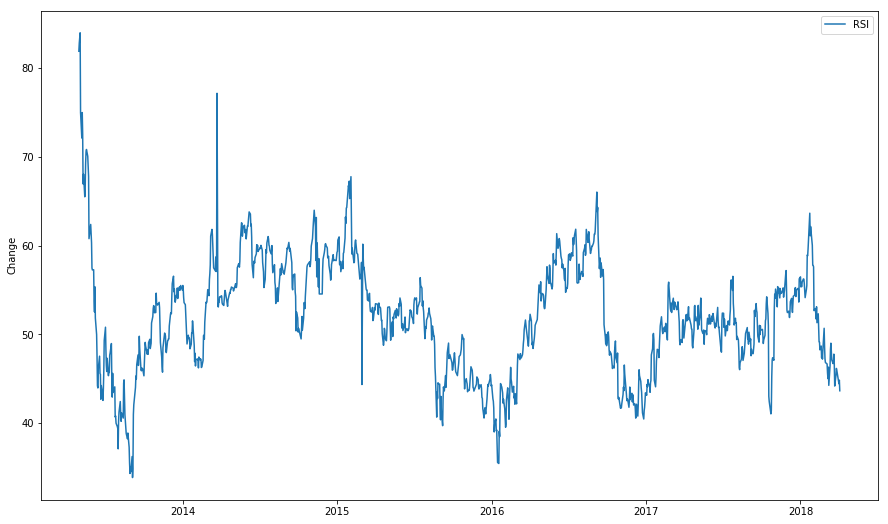

In [73]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sfd.loc[start_date:end_date, :].index, sfd.loc[start_date:end_date, 'RSI'], label = 'RSI')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Bollinger Bands (30,40,50)

In [74]:
price=df["Close"]

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

df['ave30'], df['upper30'], df['lower30'] = bbands(df.Close, length=30, numsd=1)
df['ave40'], df['upper40'], df['lower40'] = bbands(df.Close, length=40, numsd=1)
df['ave50'], df['upper50'], df['lower50'] = bbands(df.Close, length=50, numsd=1)

Text(0,0.5,'Change')

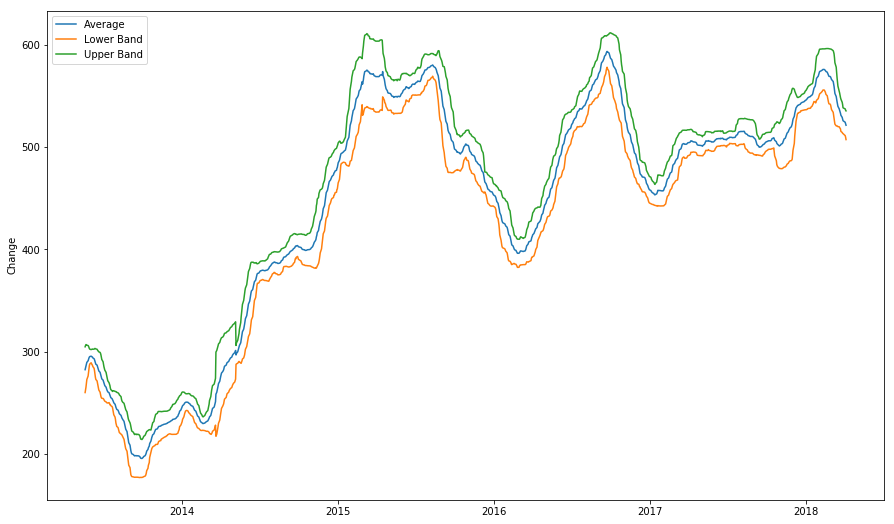

In [75]:
# For 30 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave30'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower30'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper30'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

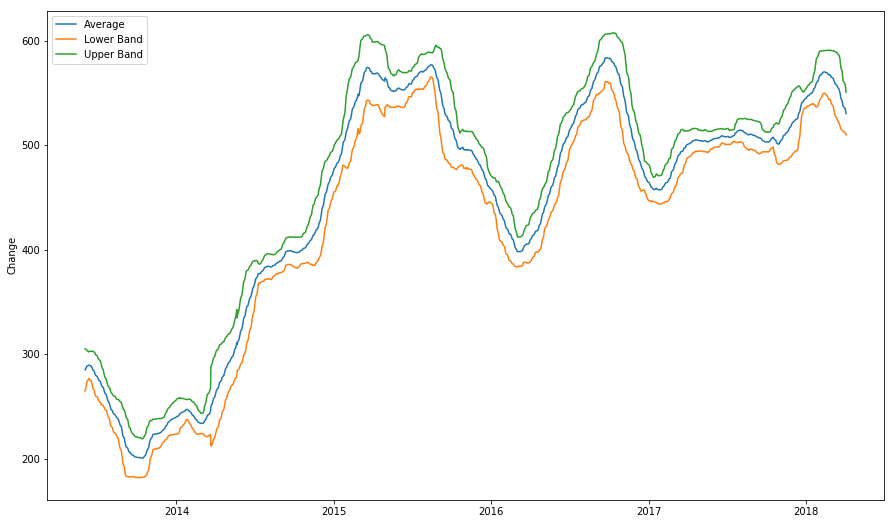

In [76]:
# For 40 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave40'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower40'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper40'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

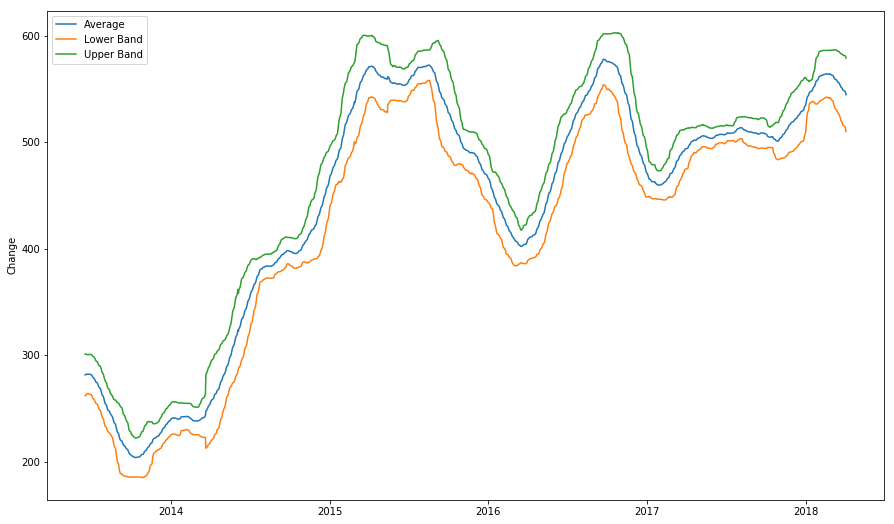

In [77]:
# For 50 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave50'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower50'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper50'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Stochastic Oscillator

In [78]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [79]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)

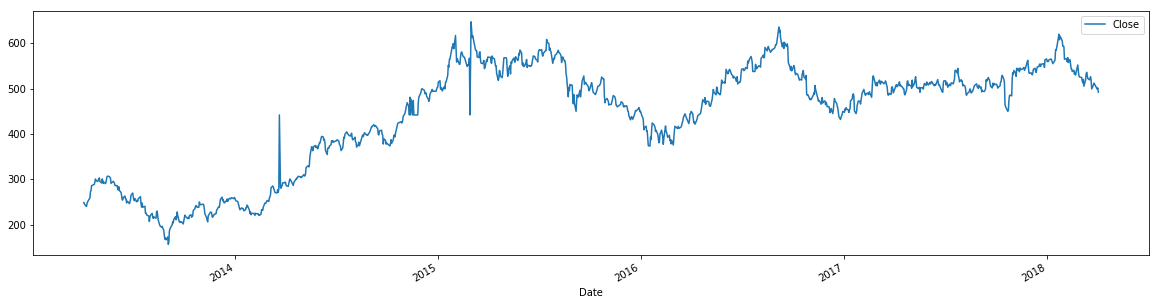

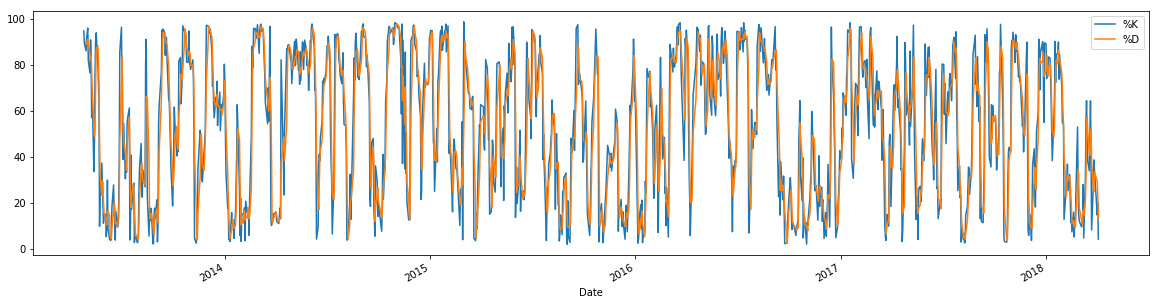

In [80]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

## Chande Oscillator

In [81]:
def avg_true_range(df): 
  ind = range(0,len(df))
  indexlist = list(ind)
  df.index = indexlist

  for index, row in df.iterrows():
    if index != 0:
      tr1 = row["High"] - row["Low"]
      tr2 = abs(row["High"] - df.iloc[index-1]["Close"])
      tr3 = abs(row["Low"] - df.iloc[index-1]["Close"])

      true_range = max(tr1, tr2, tr3)
      df.set_value(index,"True Range", true_range)

  df["Avg TR"] = df["True Range"].rolling(min_periods=14, window=14, center=False).mean()
  return df

In [82]:
def chandelier_exit(df):

  df_tr = avg_true_range(df)

  df_tr['rolling_high']= df_tr["High"]
  df_tr['rolling_low'] = df_tr["Low"]

  df_tr['chandelier_long'] = df_tr['rolling_high'] - df_tr["Avg TR"] * 3
  df_tr['chandelier_short'] = df_tr['rolling_low'] - df_tr["Avg TR"] * 3
  fig, ax = plt.subplots(figsize=(15,9))

  ax.plot(df_tr['Date'], df_tr['chandelier_long'], label = 'Chand Long')

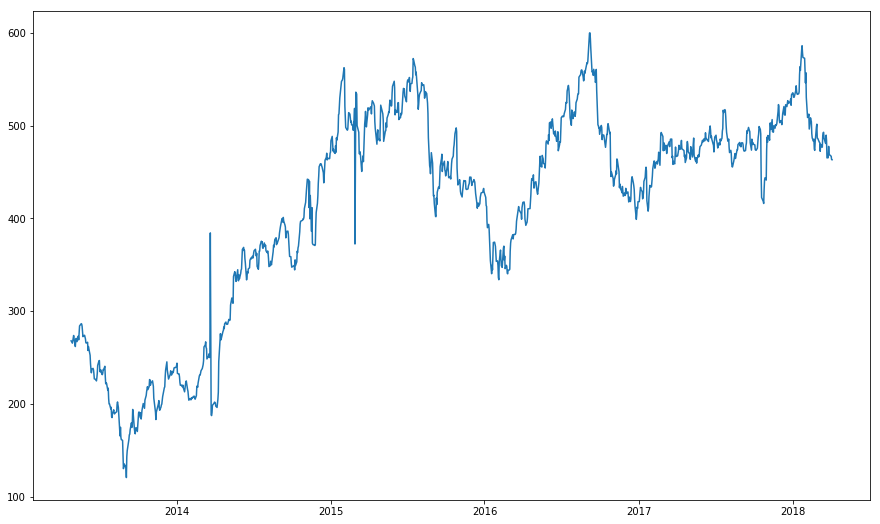

In [83]:
ch=chandelier_exit(df1)

## Commodity Channel Index (30,40,50)

In [84]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI')
 data=data.join(CCI)
 return data

In [85]:
cci30=CCI(df,30)
cci40=CCI(df,40)
cci50=CCI(df,50)

In [86]:
cci30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,lower30,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,CCI
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,253.199997,254.000000,248.020004,213.306046,6417705.0,0.000241,-0.000175,0.001663,248.770004,283.619995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,248.089996,249.869995,243.440002,210.853775,6484050.0,0.000264,-0.000088,0.001663,245.910004,275.649994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,245.300003,247.600006,239.600006,206.335022,4864420.0,0.000334,-0.000190,0.001663,240.639999,271.049988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,242.070007,247.960007,239.759995,206.335022,7490495.0,0.000342,-0.000059,0.001663,240.639999,264.540009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,242.960007,248.570007,240.000000,212.525757,10046765.0,0.000357,0.000202,0.001663,247.860001,254.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,249.309998,250.979996,246.199997,214.729401,9714180.0,0.000194,0.000045,0.001663,250.429993,254.130005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,248.000000,255.399994,246.899994,216.812988,7911225.0,0.000344,0.000196,0.001663,252.860001,259.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,251.199997,262.269989,250.800003,221.940491,7689700.0,0.000457,0.000304,0.001663,258.839996,263.209991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,257.299988,273.799988,256.549988,233.790359,11987860.0,0.000672,0.000597,0.001663,272.660004,257.320007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Change')

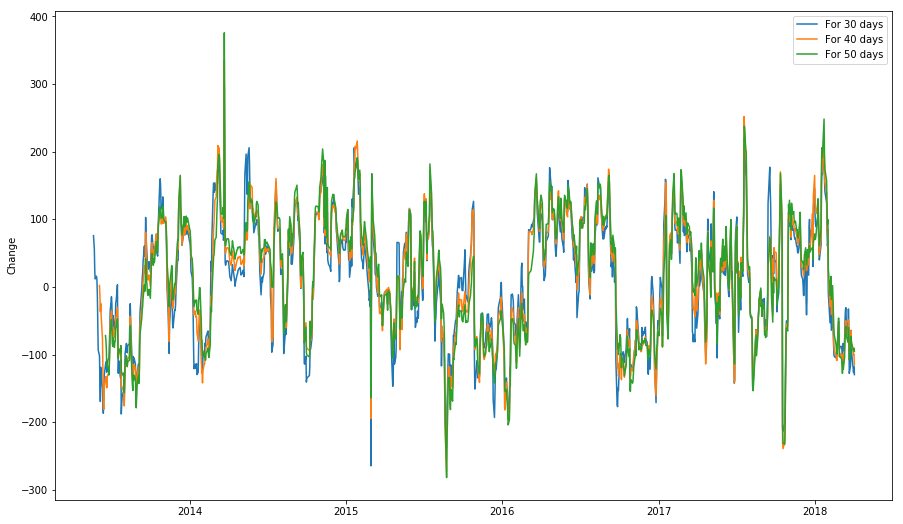

In [87]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(cci30.loc[start_date:end_date, :].index, cci30.loc[start_date:end_date, 'CCI'], label = 'For 30 days')
ax.plot(cci40.loc[start_date:end_date, :].index, cci40.loc[start_date:end_date, 'CCI'], label = 'For 40 days')
ax.plot(cci50.loc[start_date:end_date, :].index, cci50.loc[start_date:end_date, 'CCI'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Chakin Volatility Indicator (30,40,50)

In [88]:
def chaikin_oscillator(data, periods_short=3, periods_long=30, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = 0
        ac.set_value(index, val)

    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [89]:
ch30=chaikin_oscillator(df,3,30)
ch40=chaikin_oscillator(df,3,40)
ch50=chaikin_oscillator(df,3,50)

Text(0,0.5,'Change')

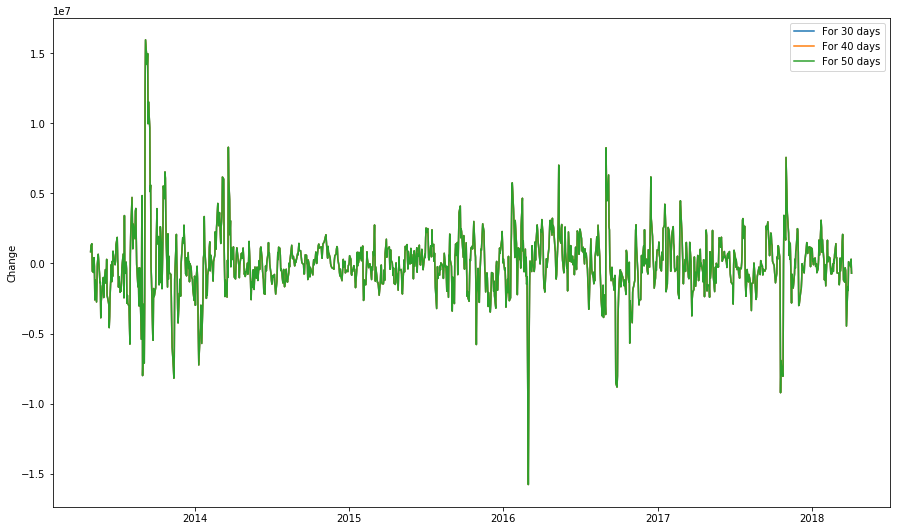

In [90]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ch30.loc[start_date:end_date, :].index, ch30.loc[start_date:end_date, 'ch_osc'], label = 'For 30 days')
ax.plot(ch40.loc[start_date:end_date, :].index, ch40.loc[start_date:end_date, 'ch_osc'], label = 'For 40 days')
ax.plot(ch50.loc[start_date:end_date, :].index, ch50.loc[start_date:end_date, 'ch_osc'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

#overlapped each other

## Rate of Price Change (30,40,50)

In [91]:
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [92]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [93]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,253.199997,254.000000,248.020004,213.306046,6417705.0,0.000241,-0.000175,0.001663,248.770004,283.619995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2013-04-05,248.089996,249.869995,243.440002,210.853775,6484050.0,0.000264,-0.000088,0.001663,245.910004,275.649994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.197364e+05,NaN
2013-04-08,245.300003,247.600006,239.600006,206.335022,4864420.0,0.000334,-0.000190,0.001663,240.639999,271.049988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.209921e+04,NaN
2013-04-09,242.070007,247.960007,239.759995,206.335022,7490495.0,0.000342,-0.000059,0.001663,240.639999,264.540009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.279710e+05,NaN
2013-04-10,242.960007,248.570007,240.000000,212.525757,10046765.0,0.000357,0.000202,0.001663,247.860001,254.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325366e+06,NaN
2013-04-11,249.309998,250.979996,246.199997,214.729401,9714180.0,0.000194,0.000045,0.001663,250.429993,254.130005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.067799e+06,NaN
2013-04-12,248.000000,255.399994,246.899994,216.812988,7911225.0,0.000344,0.000196,0.001663,252.860001,259.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.885637e+06,NaN
2013-04-15,251.199997,262.269989,250.800003,221.940491,7689700.0,0.000457,0.000304,0.001663,258.839996,263.209991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.717947e+06,NaN
2013-04-16,257.299988,273.799988,256.549988,233.790359,11987860.0,0.000672,0.000597,0.001663,272.660004,257.320007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.673626e+06,NaN


Text(0,0.5,'Change')

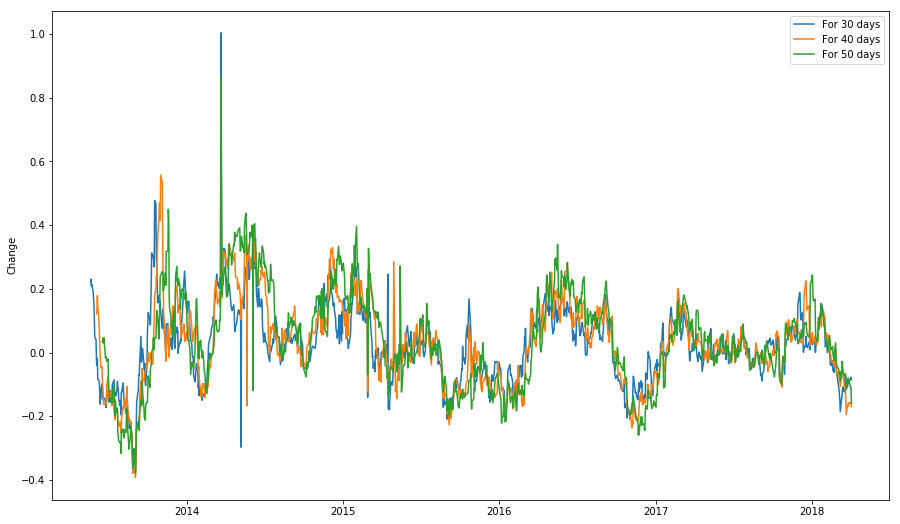

In [94]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Rate of Volume Change (30,40,50)


In [95]:
def ROC(data,n):
 N = data['Volume'].diff(n)
 D = data['Volume'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [96]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [97]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,253.199997,254.000000,248.020004,213.306046,6417705.0,0.000241,-0.000175,0.001663,248.770004,283.619995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2013-04-05,248.089996,249.869995,243.440002,210.853775,6484050.0,0.000264,-0.000088,0.001663,245.910004,275.649994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.197364e+05,NaN
2013-04-08,245.300003,247.600006,239.600006,206.335022,4864420.0,0.000334,-0.000190,0.001663,240.639999,271.049988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.209921e+04,NaN
2013-04-09,242.070007,247.960007,239.759995,206.335022,7490495.0,0.000342,-0.000059,0.001663,240.639999,264.540009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.279710e+05,NaN
2013-04-10,242.960007,248.570007,240.000000,212.525757,10046765.0,0.000357,0.000202,0.001663,247.860001,254.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325366e+06,NaN
2013-04-11,249.309998,250.979996,246.199997,214.729401,9714180.0,0.000194,0.000045,0.001663,250.429993,254.130005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.067799e+06,NaN
2013-04-12,248.000000,255.399994,246.899994,216.812988,7911225.0,0.000344,0.000196,0.001663,252.860001,259.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.885637e+06,NaN
2013-04-15,251.199997,262.269989,250.800003,221.940491,7689700.0,0.000457,0.000304,0.001663,258.839996,263.209991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.717947e+06,NaN
2013-04-16,257.299988,273.799988,256.549988,233.790359,11987860.0,0.000672,0.000597,0.001663,272.660004,257.320007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.673626e+06,NaN


Text(0,0.5,'Change')

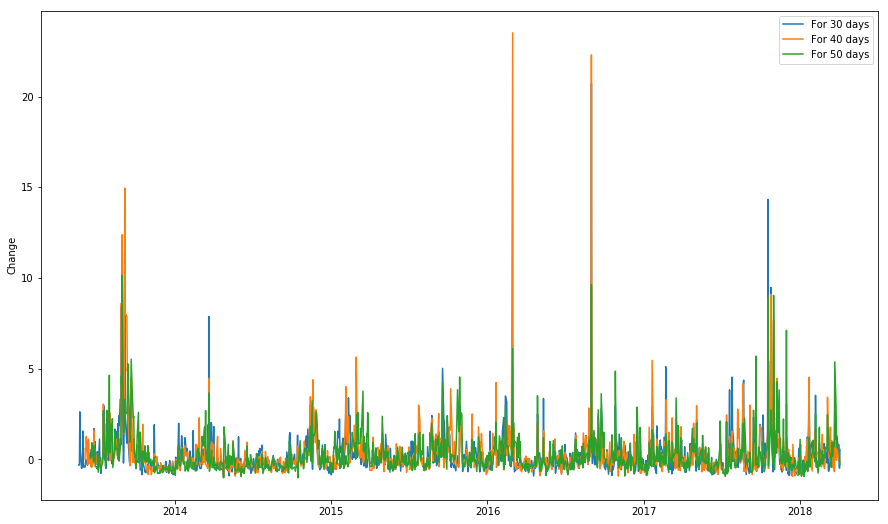

In [98]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')